In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/WORKING/Курсы/Python/Дата-сеты для всего остального /Spotify_Youtube.csv')
df.columns


Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [ ]:
df['Duration']=df['Duration_ms']/1000

In [ ]:
df[(df['Duration']<300)&(df['Duration'] >30)]

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream,Duration
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09,222.640
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08,200.173
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07,215.150
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08,233.867
5,5,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,DARE,Demon Days,album,spotify:track:4Hff1IjRbLGeLgFgxvHflk,0.760,0.891,11.0,...,Gorillaz - DARE (Official Video),Gorillaz,259021161.0,1844658.0,72008.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,3.238503e+08,245.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,...,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06,94.667
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,...,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07,150.857
20715,20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,...,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06,136.842
20716,20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,...,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6.873961e+06,108.387


In [ ]:
df=df[['Duration', 'Danceability', 'Loudness', 'Speechiness', 'Energy']].dropna()
df.describe()

,Duration,Danceability,Loudness,Speechiness,Energy
count,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000
mean,224.717579,0.619777,-7.671680,0.096456,0.635250
std,124.790543,0.165272,4.632749,0.111960,0.214147
min,30.985000,0.000000,-46.251000,0.000000,0.000020
25%,180.009500,0.518000,-8.858000,0.035700,0.507000
50%,213.284500,0.637000,-6.536000,0.050500,0.666000
75%,252.443000,0.740250,-4.931000,0.103000,0.798000
max,4676.058000,0.975000,0.920000,0.964000,1.000000


In [ ]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

In [ ]:
X=df[['Danceability', 'Loudness', 'Speechiness', 'Energy']]
Y=df['Duration']
X = sm.add_constant(X, prepend=False)


In [ ]:
model =OLS(Y,X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     59.89
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           2.26e-50
Time:                        11:57:41   Log-Likelihood:            -1.2926e+05
No. Observations:               20716   AIC:                         2.585e+05
Df Residuals:                   20711   BIC:                         2.586e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Danceability   -74.2666      5.716    -12.993   

In [ ]:
X = df[['Danceability']]
Y = df['Duration']

X = sm.add_constant(X, prepend=False)

model = OLS(Y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     166.0
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           7.80e-38
Time:                        12:00:01   Log-Likelihood:            -1.2930e+05
No. Observations:               20716   AIC:                         2.586e+05
Df Residuals:                   20714   BIC:                         2.586e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Danceability   -67.3206      5.225    -12.883   

In [ ]:
X = df[['Danceability']]
Y = df['Duration']
X = sm.add_constant(X, prepend=False)
model = OLS(Y,X)
res = model.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     166.0
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           7.80e-38
Time:                        12:05:19   Log-Likelihood:            -1.2930e+05
No. Observations:               20716   AIC:                         2.586e+05
Df Residuals:                   20714   BIC:                         2.586e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Danceability   -67.3206      5.225    -12.883   

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['Danceability', 'Loudness', 'Speechiness']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

        feature       VIF
0  Danceability  3.276311
1      Loudness  2.559760
2   Speechiness  1.826214


Задачи курса

In [ ]:
crime = pd.read_csv('/content/drive/MyDrive/WORKING/Курсы/Python/Дата-сеты для всего остального /Crimes_2015.csv')
crime.groupby('Primary Type', as_index=False)['Counts'].count().sort_values(by='Counts', ascending=False).head(1)

,Primary Type,Counts
28,THEFT,3703


In [47]:
loan=pd.read_csv('/content/drive/MyDrive/WORKING/Курсы/Python/Дата-сеты для всего остального /loan.csv')
loan

,Unnamed: 0,Married,Education,LoanAmount,Loan_Status
0,1,1,0,128.0,0
1,2,1,0,66.0,1
2,3,1,1,120.0,1
3,4,0,0,141.0,1
4,5,1,0,267.0,1
...,...,...,...,...,...
475,495,1,0,105.0,1
476,496,1,1,107.0,1
477,497,1,0,111.0,1
478,498,1,0,95.0,1


In [61]:
import matplotlib.pyplot as plt


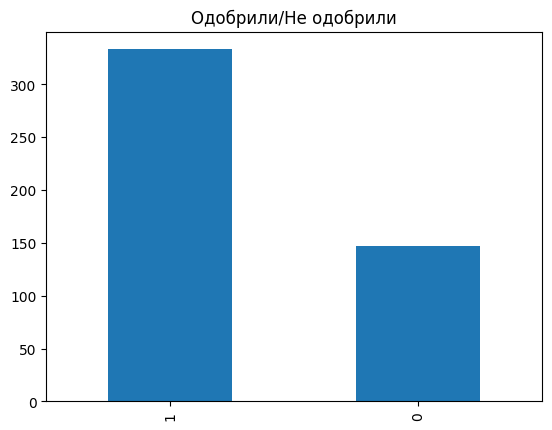

In [62]:
  loan['Loan_Status'].value_counts().plot(kind='bar', title='Одобрили/Не одобрили')
  plt.savefig('result.png')



In [75]:
import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
import statsmodels.stats.tests.test_influence
import numpy as np

In [76]:
#model_1= sm.GLM(loan['Loan_Status'], loan['Married'])

<Axes: >

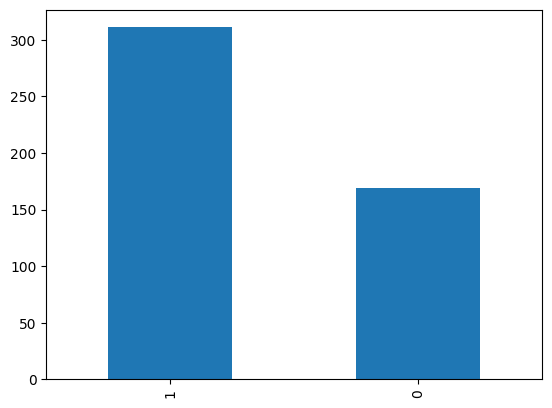

In [77]:
loan['Married'].value_counts().plot(kind='bar')

<Axes: >

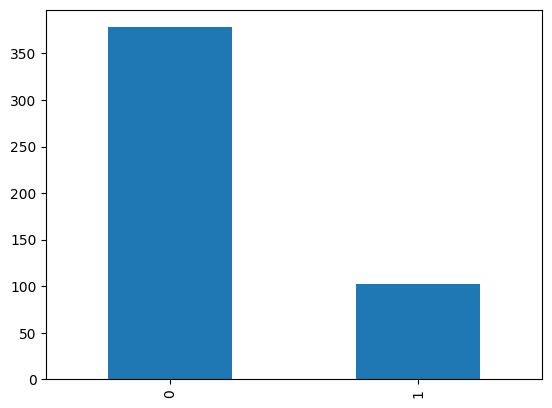

In [78]:
loan['Education'].value_counts().plot(kind='bar')

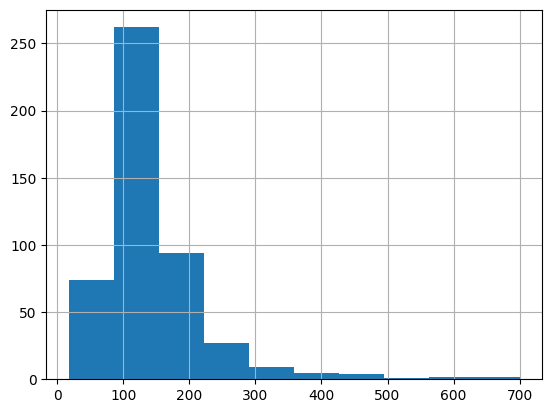

In [79]:
hist = loan['LoanAmount'].hist()


In [86]:
model_1= sm.GLM(loan['Loan_Status'], loan[['Married','Education', 'LoanAmount']], family=families.Binomial()).fit()
print(model_1.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:            Loan_Status   No. Observations:                  480
Model:                            GLM   Df Residuals:                      477
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -300.39
Date:                Tue, 17 Oct 2023   Deviance:                       600.79
Time:                        14:11:08   Pearson chi2:                     482.
No. Iterations:                     4   Pseudo R-squ. (CS):           -0.01970
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Married        0.8005      0.185      4.333      0.0

In [87]:
model_odds = pd.DataFrame(np.exp(model_1.params), columns= ['Odds Ratio'])
print(model_odds)

            Odds Ratio
Married       2.226661
Education     0.865475
LoanAmount    1.001195


In [91]:
X = loan[['Married','Education', 'LoanAmount']]


In [92]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [93]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

In [94]:
print(vif_data)


      feature       VIF
0     Married  2.294270
1   Education  1.181951
2  LoanAmount  2.183028


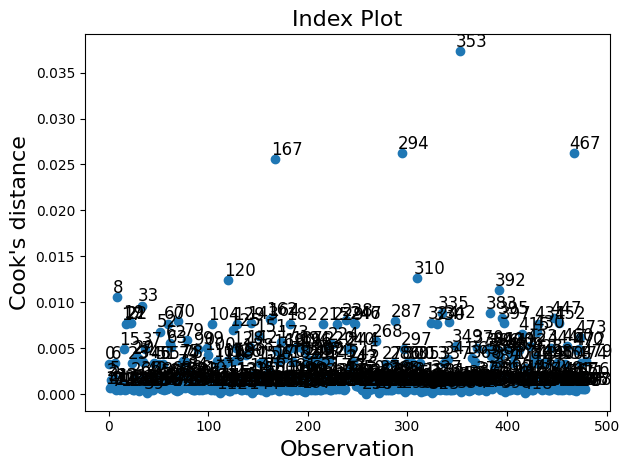

In [95]:
infl = model_1.get_influence()
fig = infl.plot_index(y_var="cooks")
fig.tight_layout()